In [12]:
from __future__ import division
import matplotlib
from pylab import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
import numpy as np
import pandas as pd
import math
import h5py

In [13]:
fontSize=16
#matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'font.family':'MathJax_SansSerif', 'font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'DejaVu Sans','font.sans-serif':'Helvetica','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
plotStyles={"markersize":8,"markeredgewidth":1.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
barStyles={"width":0.65, "linewidth":0, "align":"center"}

/Users/turtle/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


# I. Data check 

In [27]:
df=pd.read_csv('TECAN_210826.csv',delimiter=',',index_col=0)  

## check temperature

Text(0, 0.5, 'Temperature (C)')

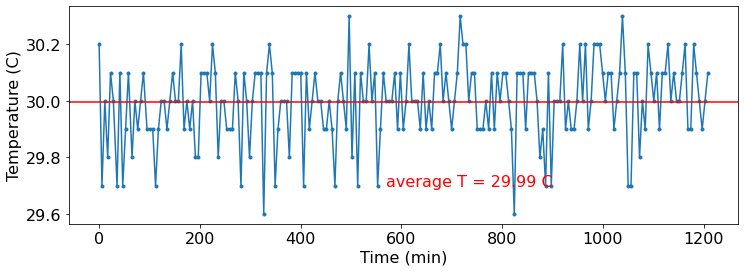

In [28]:
def f_constant(x,c):
    return c
xdata = df.to_numpy()[0]/60;
ydata = df.to_numpy()[1];
param, cov = curve_fit(f_constant, xdata[1:], ydata[1:])
av_T = str(param[0])[:5]
plt.rcParams["figure.figsize"] = (12,4)
plt.plot(xdata, ydata, '.-')
plt.axhline(param[0],color='r')
plt.text(570, 29.7, 'average T = '+av_T+' C', color='red')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (C)')

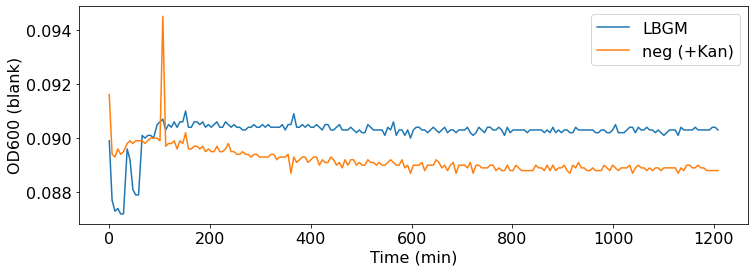

In [29]:
xdata = df.to_numpy()[0]/60;
ydata1 = df.loc['D6'].to_numpy()
ydata2 = df.loc['D5'].to_numpy()
plt.rcParams["figure.figsize"] = (12,4)
plt.plot(xdata, ydata1,label='LBGM')
plt.plot(xdata, ydata2,label='neg (+Kan)')
plt.xlabel('Time (min)')
plt.ylabel('OD600 (blank)')
plt.legend()

In [30]:
#idx = np.array([-11,-10,-8,-7,-6,-5,-4,-3,-2,-1]);
idx = np.arange(2,8,1);
idx

array([2, 3, 4, 5, 6, 7])

Text(0.5, 1.0, 'MOI=0.1')

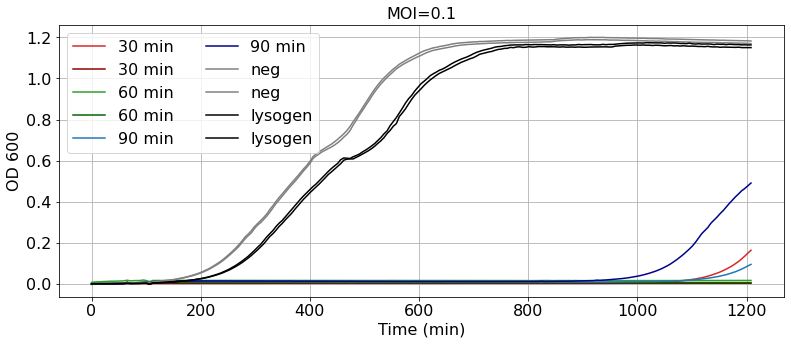

In [31]:
idx = np.arange(2,8,1);
idx = np.concatenate((idx, np.array([20,21,22,23])), axis=None)

time = df.to_numpy()[0]/60
empty_sample = df.to_numpy()[idx] - df.loc['D5'].to_numpy()
#labels = df.index[idx].to_list()
labels = ['30 min','30 min','60 min', '60 min', '90 min', '90 min','neg','neg','lysogen','lysogen']; 
colors = ['tab:red','darkred','tab:green','darkgreen','tab:blue','darkblue','grey','grey','black','black']
time = df.to_numpy()[0]/60
#mean_empty_sample = np.mean(empty_sample,axis=0)

plt.rcParams["figure.figsize"] = (13,5)
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, empty_sample[i,:],alpha=1, label = labels[i], color=colors[i])
#plt.plot(time,mean_empty_sample, linewidth = 2, color='k',label='blank (mean)')
#plt.ylim(0.089,0.1)
plt.legend(ncol=2,loc='upper left')
plt.ylabel('OD 600')
plt.xlabel('Time (min)')
plt.grid('on')
plt.title('MOI=0.1')

Text(0.5, 1.0, 'MOI=1')

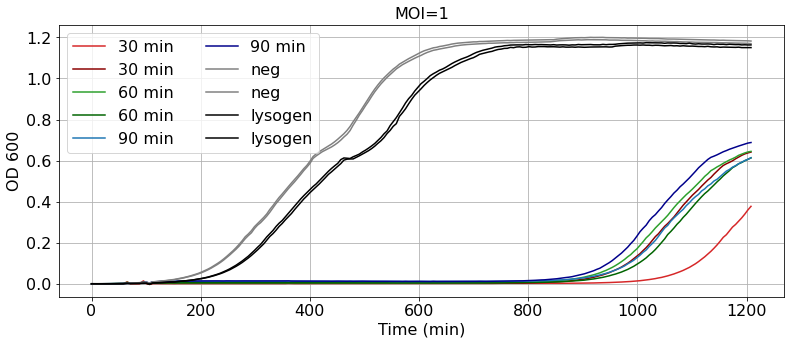

In [32]:
idx = np.arange(8,14,1);
idx = np.concatenate((idx, np.array([20,21,22,23])), axis=None)

time = df.to_numpy()[0]/60
empty_sample = df.to_numpy()[idx]-df.loc['D5'].to_numpy()
labels = ['30 min','30 min','60 min', '60 min', '90 min', '90 min','neg','neg','lysogen','lysogen']; 
colors = ['tab:red','darkred','tab:green','darkgreen','tab:blue','darkblue','grey','grey','black','black']

time = df.to_numpy()[0]/60
#mean_empty_sample = np.mean(empty_sample,axis=0)

plt.rcParams["figure.figsize"] = (13,5)
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, empty_sample[i,:],alpha=1, label = labels[i], color=colors[i])
#plt.plot(time,mean_empty_sample, linewidth = 2, color='k',label='blank (mean)')
#plt.ylim(0.089,0.1)
plt.legend(ncol=2)
plt.ylabel('OD 600')
plt.xlabel('Time (min)')
plt.grid('on')
plt.title('MOI=1')

Text(0.5, 1.0, 'MOI=10')

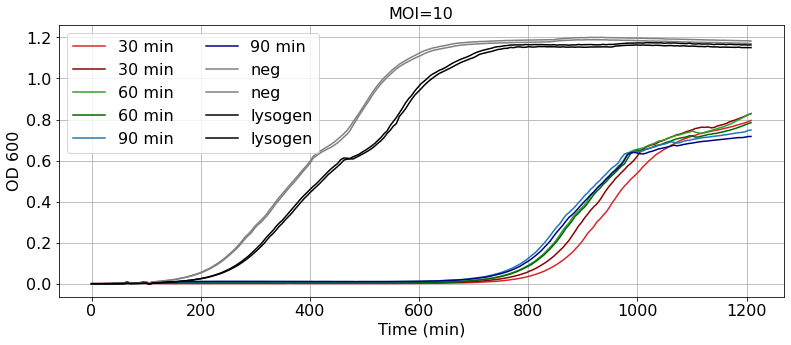

In [33]:
idx = np.arange(14,20,1);
idx = np.concatenate((idx, np.array([20,21,22,23])), axis=None)

time = df.to_numpy()[0]/60
empty_sample = df.to_numpy()[idx]-df.loc['D5'].to_numpy()
labels = ['30 min','30 min','60 min', '60 min', '90 min', '90 min','neg','neg','lysogen','lysogen']; 
colors = ['tab:red','darkred','tab:green','darkgreen','tab:blue','darkblue','grey','grey','black','black']

time = df.to_numpy()[0]/60
#mean_empty_sample = np.mean(empty_sample,axis=0)

plt.rcParams["figure.figsize"] = (13,5)
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, empty_sample[i,:],alpha=1, label = labels[i], color=colors[i])
#plt.plot(time,mean_empty_sample, linewidth = 2, color='k',label='blank (mean)')
#plt.ylim(0.089,0.1)
plt.legend(ncol=2)
plt.ylabel('OD 600')
plt.xlabel('Time (min)')
plt.grid('on')
plt.title('MOI=10')

Text(0.5, 1.0, 'Kan@30 min')

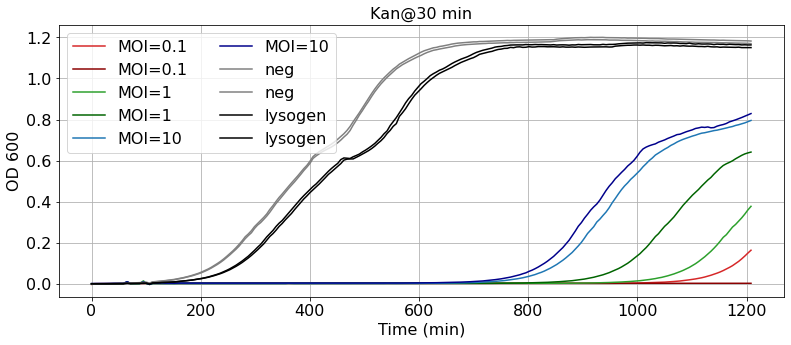

In [34]:
idx = np.array([2,3,8,9,14,15]);
idx = np.concatenate((idx, np.array([20,21,22,23])), axis=None)

time = df.to_numpy()[0]/60
empty_sample = df.to_numpy()[idx]-df.loc['D5'].to_numpy()
labels = ['MOI=0.1','MOI=0.1','MOI=1', 'MOI=1', 'MOI=10', 'MOI=10','neg','neg','lysogen','lysogen']; 
colors = ['tab:red','darkred','tab:green','darkgreen','tab:blue','darkblue','grey','grey','black','black']; 

time = df.to_numpy()[0]/60
#mean_empty_sample = np.mean(empty_sample,axis=0)

plt.rcParams["figure.figsize"] = (13,5)
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, empty_sample[i,:],alpha=1, label = labels[i], color=colors[i])
#plt.plot(time,mean_empty_sample, linewidth = 2, color='k',label='blank (mean)')
#plt.ylim(0.089,0.1)
plt.legend(ncol=2)
plt.ylabel('OD 600')
plt.xlabel('Time (min)')
plt.grid('on')
plt.title('Kan@30 min')

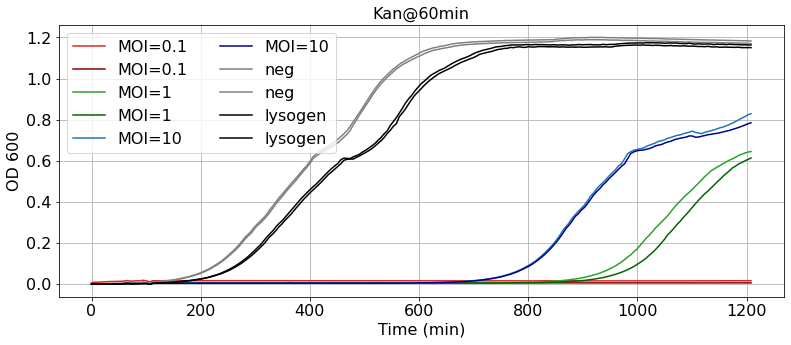

In [35]:
idx = np.array([2,3,8,9,14,15])+2;
idx = np.concatenate((idx, np.array([20,21,22,23])), axis=None)

time = df.to_numpy()[0]/60
empty_sample = df.to_numpy()[idx]-df.loc['D5'].to_numpy()
labels = ['MOI=0.1','MOI=0.1','MOI=1', 'MOI=1', 'MOI=10', 'MOI=10','neg','neg','lysogen','lysogen']; 
colors = ['tab:red','darkred','tab:green','darkgreen','tab:blue','darkblue','grey','grey','black','black']; 

time = df.to_numpy()[0]/60
#mean_empty_sample = np.mean(empty_sample,axis=0)

plt.rcParams["figure.figsize"] = (13,5)
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, empty_sample[i,:],alpha=1, label = labels[i],color=colors[i])
#plt.plot(time,mean_empty_sample, linewidth = 2, color='k',label='blank (mean)')
#plt.ylim(0.089,0.1)
plt.legend(ncol=2)
plt.ylabel('OD 600')
plt.xlabel('Time (min)')
plt.title('Kan@60min')
plt.grid('on')

Text(0.5, 1.0, 'Kan@90min')

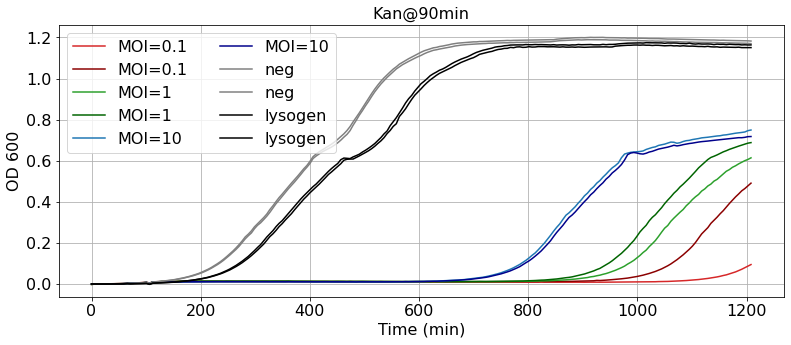

In [36]:
idx = np.array([2,3,8,9,14,15])+4;
idx = np.concatenate((idx, np.array([20,21,22,23])), axis=None)

time = df.to_numpy()[0]/60
empty_sample = df.to_numpy()[idx]-df.loc['D5'].to_numpy()
labels = ['MOI=0.1','MOI=0.1','MOI=1', 'MOI=1', 'MOI=10', 'MOI=10','neg','neg','lysogen','lysogen']; 
colors = ['tab:red','darkred','tab:green','darkgreen','tab:blue','darkblue','grey','grey','black','black']; 

time = df.to_numpy()[0]/60
#mean_empty_sample = np.mean(empty_sample,axis=0)

plt.rcParams["figure.figsize"] = (13,5)
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, empty_sample[i,:],alpha=1, label = labels[i],color=colors[i])
#plt.plot(time,mean_empty_sample, linewidth = 2, color='k',label='blank (mean)')
#plt.ylim(0.089,0.1)
plt.legend(ncol=2)
plt.ylabel('OD 600')
plt.xlabel('Time (min)')
plt.grid('on')
plt.title('Kan@90min')

# II. Estimation on growth rate

## choice of linear range

In [461]:
def get_linear_range(time, data, R_square_thresh, plot_yes):
    R_square_thresh = 0.999; 
    
    # skip nan
    start_idx = 0; 
    tmp = np.where(np.isnan(data)==True)[0]
    if len(tmp) > 0:
        start_idx = tmp[-1]
        
    # skip low values
    tmp = np.where(data >= np.log2(0.014))[0]
    if len(tmp) > 0:
        start_idx = max(start_idx, tmp[0])
        
    # choose starting point
    end_idx = min(start_idx+30, len(data)); 
    starting_idx = np.arange(start_idx,end_idx,1);
#    print(start_idx)
#    print(end_idx)
    R_square0 = np.array([]);
    for j in starting_idx:
        xdata = time[j:j+12];
        ydata = data[j:j+12];
        slope, intercept, r_value, _, _ = linregress(xdata, ydata);
        R_square0 = np.append(R_square0, r_value);
    
    if (len(np.where(R_square0>R_square_thresh)[0]) == 0):
        print('fail to find starting points: please lower R_square_thresh');
        return np.array([0,0])
    else:
        j_0 = starting_idx[np.where(R_square0>R_square_thresh)[0][0]];
    
        # choose number of fitting points
        R_square = np.array([]);
        max_points_allowed = len(data)-j_0;
        if max_points_allowed == 0:
            print('fail to find #fitting points: please lower R_square_thresh');
            return np.array([0,0])
        else:
            if max_points_allowed <= 20: #what about = 0? 
                fitting_points = np.array([max_points_allowed]);
            else:
                fitting_points = np.arange(20,min(40,max_points_allowed),1);
            for j in fitting_points:
                xdata = time[j_0:j_0+j];
                ydata = data[j_0:j_0+j];
                slope, intercept, r_value, _, _ = linregress(xdata, ydata);
                R_square = np.append(R_square, r_value);
            tmp2 = np.argmax(R_square);
            j = fitting_points[tmp2]; 
            if plot_yes == True:
                plt.rcParams["figure.figsize"] = (8,7)
                subplot(2,1,1)
                plt.plot(starting_idx, R_square0,'.-');
                plt.axhline(R_square_thresh,color='red');
                plt.axvline(j_0,color='k',alpha = 0.5);
                plt.xlabel('index of fitting start point')
                plt.ylabel('R squared')
                plt.grid(True)
                subplot(2,1,2)
                plt.plot(fitting_points, R_square,'.-');
                plt.axhline(R_square_thresh,color='red');
                plt.axvline(j,color='k',alpha = 0.5);
                plt.xlabel('number of fitting points')
                plt.ylabel('R squared')
                plt.grid(True)
                plt.tight_layout()
            return np.array([j_0, j]);
    

<ipython-input-462-7e46ae9b89da>:1: RuntimeWarning: invalid value encountered in log2
  get_linear_range(time, np.log2(df.to_numpy()[13]-ave_blank), 0, 1)


array([153,  25])

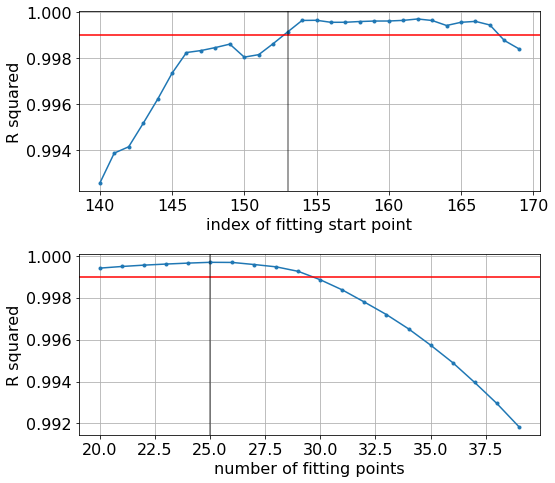

In [462]:
get_linear_range(time, np.log2(df.to_numpy()[13]-ave_blank), 0, 1)

## estimate growth rate

<ipython-input-187-6396f7f248c8>:16: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
<ipython-input-187-6396f7f248c8>:16: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
<ipython-input-187-6396f7f248c8>:16: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
<ipython-input-187-6396f7f248c8>:16: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
<ipython-input-187-6396f7f248c8>:16: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);


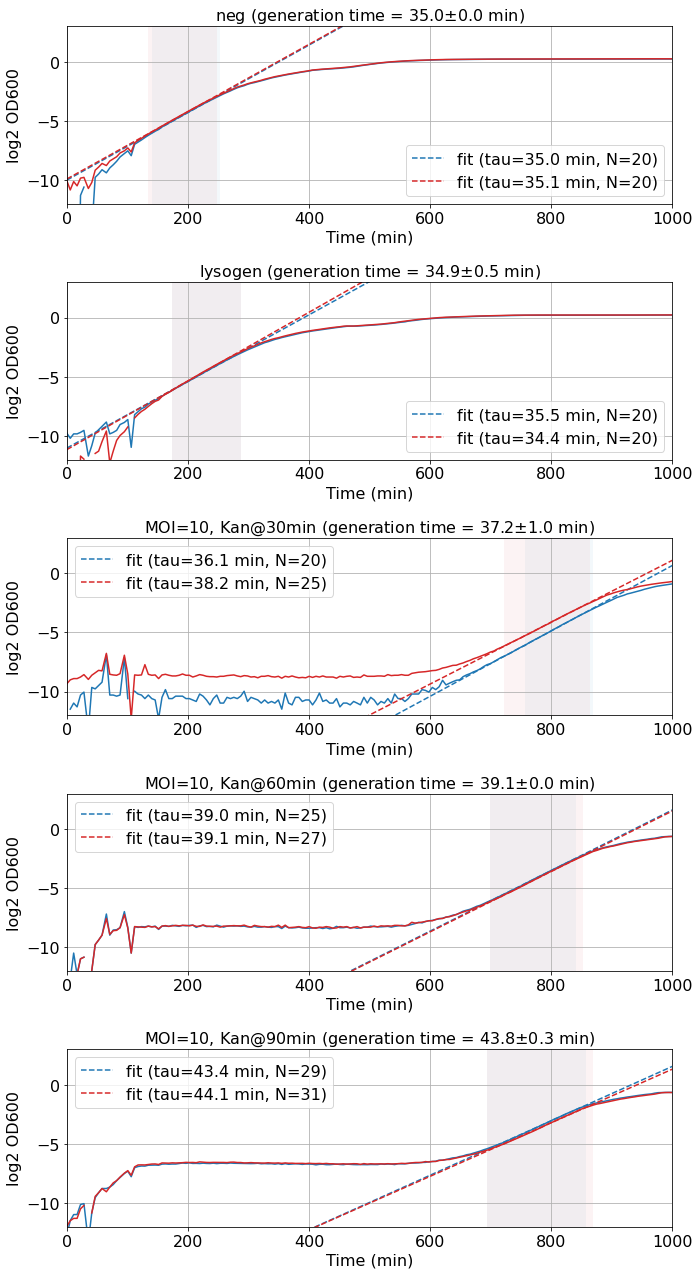

In [187]:
idx_blank = np.array([24,25]);
idx_30 = np.array([14,15]);
idx_60 = np.array([16,17]);
idx_90 = np.array([18,19]);
idx_neg = np.array([20,21]);
idx_lys = np.array([22,23]);

time = df.to_numpy()[0]/60

ave_blank = np.mean(df.to_numpy()[idx_blank],axis=0)

plt.rcParams["figure.figsize"] = (10,18)
k = 0;
labels = ['neg','lysogen','MOI=10, Kan@30min','MOI=10, Kan@60min','MOI=10, Kan@90min'];
for i in (idx_neg, idx_lys, idx_30, idx_60, idx_90):
    sample = np.log2(df.to_numpy()[i]-ave_blank);
    slope_array = np.array([]);
    inter_array = np.array([]); 
    generation_time_tmp = np.array([]);
    subplot(5,1,k+1);
    colors = ['tab:blue','tab:red','tab:purple','tab:green']
    min_j0 = 1e4;
    max_j = 0; 
    for kk in range(0,len(sample)):
        data = sample[kk,:];
        array_tmp = get_linear_range(time, data, 0.999, 0);
        j_0 = array_tmp[0];
        j = array_tmp[1];
        if j_0 < min_j0:
            min_j0 = j_0; 
        if j+j_0 > max_j:
            max_j = j+j_0; 
        xdata = time[j_0:j_0+j];
        ydata = data[j_0:j_0+j];
        slope, intercept, r_value, _, stderr = linregress(xdata, ydata);
        generation_time_tmp = np.append(generation_time_tmp, 1/slope); 
        slope_array = np.append(slope_array, slope)
        inter_array = np.append(inter_array, intercept)
        
        generation_time = str(1/slope)[:4]; 
        
        plt.plot(time, data, color = colors[kk]);
        plt.plot(time, slope*time+intercept, '--', color = colors[kk],\
                 label='fit (tau='+generation_time+' min,'+' N='+str(j)+')')
        plt.axvspan(time[j_0], time[j_0+j], facecolor=colors[kk], alpha=0.05)
    min_j0 = max(0, min_j0-50);
    max_j = min(len(data),max_j+50);
#    plt.xlim((time[min_j0], time[max_j]))
    plt.xlim((0,1000))
    plt.ylim((-12,3))
    plt.legend(); plt.grid(True);
    plt.ylabel('log2 OD600'); plt.xlabel('Time (min)')
    generation_time = str(np.mean(generation_time_tmp))[:4];
    generation_time_err = str(np.std(generation_time_tmp))[:3];
    plt.title(labels[k]+' (generation time = '+generation_time+'$\pm$'+generation_time_err+' min)')
    k = k+1; 
plt.tight_layout()

In [228]:
sample_d = {};

class Sample:
    def __init__(self, name, sample_idx, growth_rate,N0):
        self.sample_name = name
        self.sample_idx = sample_idx
        self.growth_rate = growth_rate
        self.N0 = N0

<ipython-input-229-fa9a82f229cd>:17: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
<ipython-input-229-fa9a82f229cd>:17: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
<ipython-input-229-fa9a82f229cd>:17: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
<ipython-input-229-fa9a82f229cd>:17: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
<ipython-input-229-fa9a82f229cd>:17: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);


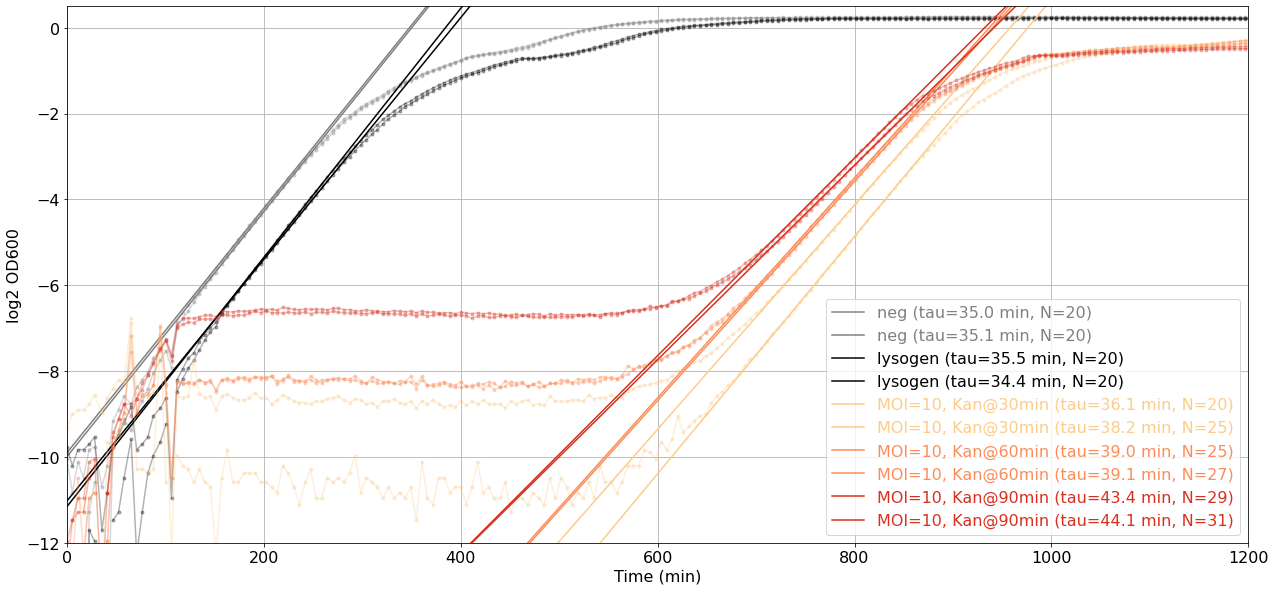

In [229]:
idx_blank = np.array([24,25]);
idx_30 = np.array([14,15]);
idx_60 = np.array([16,17]);
idx_90 = np.array([18,19]);
idx_neg = np.array([20,21]);
idx_lys = np.array([22,23]);

time = df.to_numpy()[0]/60

ave_blank = np.mean(df.to_numpy()[idx_blank],axis=0)

plt.rcParams["figure.figsize"] = (18,8.5)
k = 0;
labels = ['neg','lysogen','MOI=10, Kan@30min','MOI=10, Kan@60min','MOI=10, Kan@90min'];
colors = ['grey','black','#fdcc8a','#fc8d59','#d7301f','tab:green'];
for i in (idx_neg, idx_lys, idx_30, idx_60, idx_90):
    sample = np.log2(df.to_numpy()[i]-ave_blank);
    min_j0 = 1e4;
    max_j = 0; 
    for kk in range(0,len(sample)):
        data = sample[kk,:];
        array_tmp = get_linear_range(time, data, 0.999, 0);
        j_0 = array_tmp[0];
        j = array_tmp[1];
        if j_0 < min_j0:
            min_j0 = j_0; 
        if j+j_0 > max_j:
            max_j = j+j_0; 
        xdata = time[j_0:j_0+j];
        ydata = data[j_0:j_0+j];
        slope, intercept, r_value, _, stderr = linregress(xdata, ydata);
        sample_d[i[kk]] = Sample(labels[k], i[kk], 1/slope, intercept);         
        generation_time = str(1/slope)[:4]; 
        plt.plot(time, data, '.-',color = colors[k], alpha=0.3);
        plt.plot(time, slope*time+intercept, '-', color = colors[k], \
                 label=labels[k]+' (tau='+generation_time+' min,'+' N='+str(j)+')')
#        plt.axvspan(time[j_0], time[j_0+j], facecolor=colors[k], alpha=0.05)
    k = k+1; 
plt.xlim((0,1200))
plt.ylim((-12,0.5))
plt.legend(labelcolor='linecolor'); plt.grid(True);
plt.ylabel('log2 OD600'); plt.xlabel('Time (min)')
plt.tight_layout()

<ipython-input-235-ea5670056ab1>:17: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
<ipython-input-235-ea5670056ab1>:17: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
<ipython-input-235-ea5670056ab1>:17: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
<ipython-input-235-ea5670056ab1>:17: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
<ipython-input-235-ea5670056ab1>:17: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);


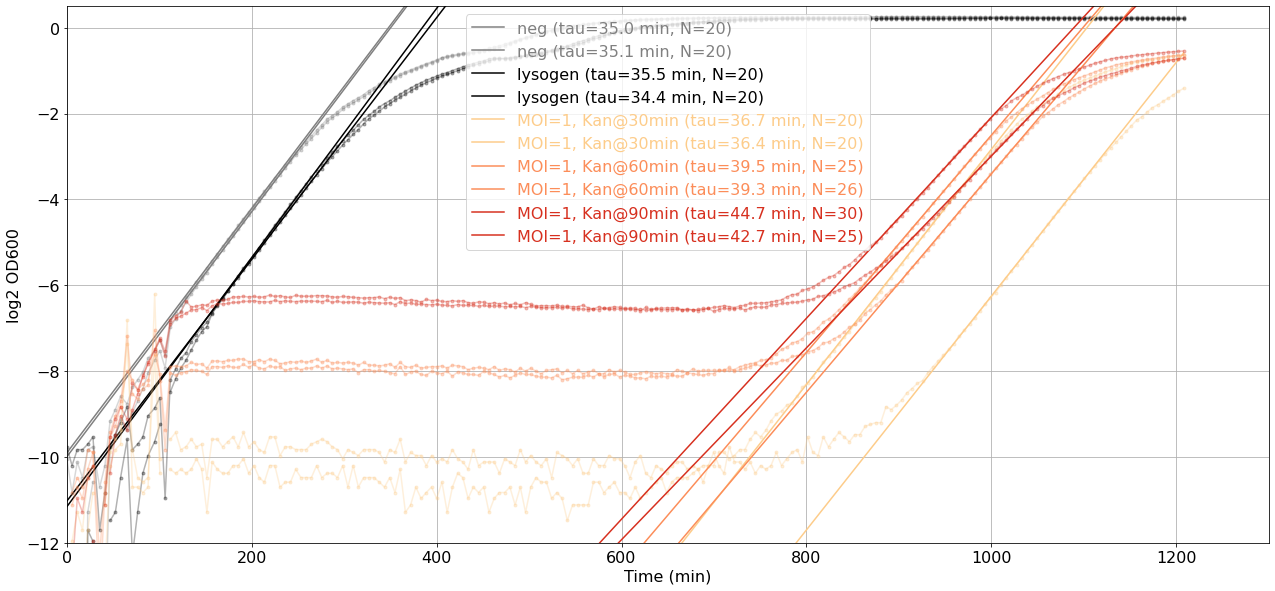

In [235]:
idx_blank = np.array([24,25]);
idx_30 = np.array([14,15])-6;
idx_60 = np.array([16,17])-6;
idx_90 = np.array([18,19])-6;
idx_neg = np.array([20,21]);
idx_lys = np.array([22,23]);

time = df.to_numpy()[0]/60

ave_blank = np.mean(df.to_numpy()[idx_blank],axis=0)

plt.rcParams["figure.figsize"] = (18,8.5)
k = 0;
labels = ['neg','lysogen','MOI=1, Kan@30min','MOI=1, Kan@60min','MOI=1, Kan@90min'];
colors = ['grey','black','#fdcc8a','#fc8d59','#d7301f','tab:green'];
for i in (idx_neg, idx_lys, idx_30, idx_60, idx_90):
    sample = np.log2(df.to_numpy()[i]-ave_blank);
    min_j0 = 1e4;
    max_j = 0; 
    for kk in range(0,len(sample)):
        data = sample[kk,:];
        array_tmp = get_linear_range(time, data, 0.99, 0);
        j_0 = array_tmp[0];
        j = array_tmp[1];
        if j == 0:
            next;
        else:
            if j_0 < min_j0:
                min_j0 = j_0; 
            if j+j_0 > max_j:
                max_j = j+j_0; 
            xdata = time[j_0:j_0+j];
            ydata = data[j_0:j_0+j];
            slope, intercept, r_value, _, stderr = linregress(xdata, ydata);
            sample_d[i[kk]] = Sample(labels[k], i[kk], 1/slope, intercept);  
            
            generation_time = str(1/slope)[:4]; 
            plt.plot(time, data, '.-',color = colors[k], alpha=0.3);
            plt.plot(time, slope*time+intercept, '-', color = colors[k], \
                     label=labels[k]+' (tau='+generation_time+' min,'+' N='+str(j)+')')
    k = k+1; 
plt.xlim((0,1300))
plt.ylim((-12,0.5))
plt.legend(labelcolor='linecolor',loc='upper center'); plt.grid(True);
plt.ylabel('log2 OD600'); plt.xlabel('Time (min)')
plt.tight_layout()

<ipython-input-236-fa06f6b1ec97>:17: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
<ipython-input-236-fa06f6b1ec97>:17: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
<ipython-input-236-fa06f6b1ec97>:17: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
<ipython-in

fail to find starting points: please lower R_square_thresh
fail to find starting points: please lower R_square_thresh
fail to find starting points: please lower R_square_thresh


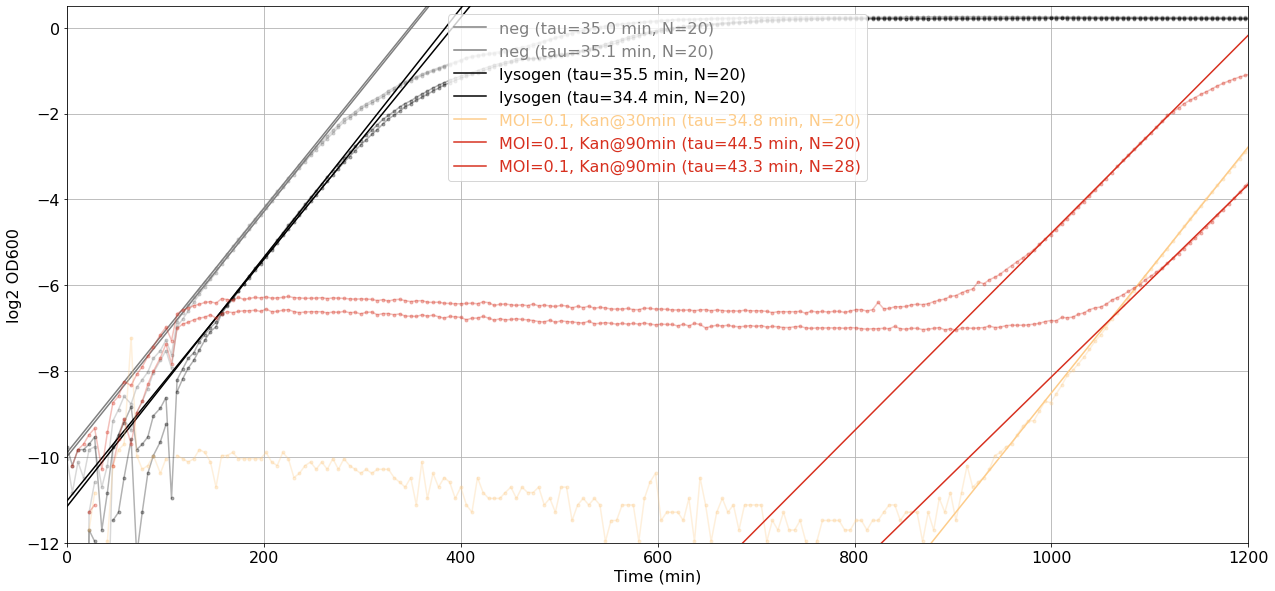

In [236]:
idx_blank = np.array([24,25]);
idx_30 = np.array([14,15])-12;
idx_60 = np.array([16,17])-12;
idx_90 = np.array([18,19])-12;
idx_neg = np.array([20,21]);
idx_lys = np.array([22,23]);

time = df.to_numpy()[0]/60

ave_blank = np.mean(df.to_numpy()[idx_blank],axis=0)

plt.rcParams["figure.figsize"] = (18,8.5)
k = 0;
labels = ['neg','lysogen','MOI=0.1, Kan@30min','MOI=0.1, Kan@60min','MOI=0.1, Kan@90min'];
colors = ['grey','black','#fdcc8a','#fc8d59','#d7301f','tab:green'];
for i in (idx_neg, idx_lys, idx_30, idx_60, idx_90):
    sample = np.log2(df.to_numpy()[i]-ave_blank);
    slope_array = np.array([]);
    inter_array = np.array([]); 
    min_j0 = 1e4;
    max_j = 0; 
    for kk in range(0,len(sample)):
        data = sample[kk,:];
        array_tmp = get_linear_range(time, data, 0.99, 0);
        j_0 = array_tmp[0];
        j = array_tmp[1];
        if j == 0:
            next;
        else:
            if j_0 < min_j0:
                min_j0 = j_0; 
            if j+j_0 > max_j:
                max_j = j+j_0; 
            xdata = time[j_0:j_0+j];
            ydata = data[j_0:j_0+j];
            slope, intercept, r_value, _, stderr = linregress(xdata, ydata);
            
            sample_d[i[kk]] = Sample(labels[k], i[kk], 1/slope, intercept); 
            
            generation_time = str(1/slope)[:4]; 
            plt.plot(time, data, '.-',color = colors[k], alpha=0.3);
            plt.plot(time, slope*time+intercept, '-', color = colors[k], \
                     label=labels[k]+' (tau='+generation_time+' min,'+' N='+str(j)+')')
    k = k+1; 
plt.xlim((0,1200))
plt.ylim((-12,0.5))
plt.legend(labelcolor='linecolor',loc='upper center'); plt.grid(True);
plt.ylabel('log2 OD600'); plt.xlabel('Time (min)')
plt.tight_layout()

## bar plot summary

In [255]:
'MOI=0.1,' in sample_d[2].sample_name

True

In [256]:
sample_d[2].growth_rate

34.88205800804009

In [253]:
sorted(sample_d.keys())

[2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

In [289]:
colors_d = {
    'lysogen': 'black',
    'neg': 'grey',
    'MOI=0.1, Kan@30min': '#b2e2e2',
    'MOI=0.1, Kan@60min': '#66c2a4',
    'MOI=0.1, Kan@90min':'#238b45',
    'MOI=1, Kan@30min': '#fdcc8a',
    'MOI=1, Kan@60min': '#fc8d59',
    'MOI=1, Kan@90min':'#d7301f',
    'MOI=10, Kan@30min': '#d7b5d8',
    'MOI=10, Kan@60min': '#df65b0',
    'MOI=10, Kan@90min':'#ce1256'
}

Text(0, 0.5, 'doubling time (min)')

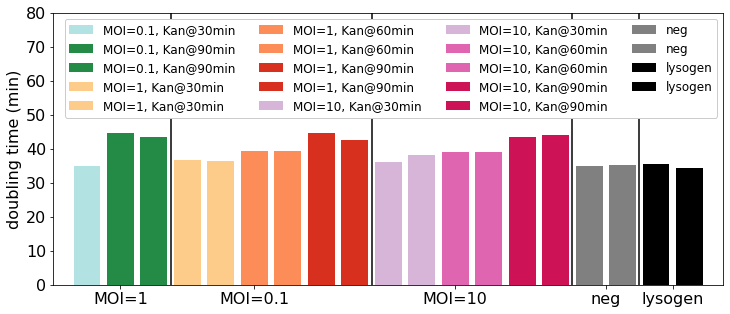

In [328]:
kk = 0;
xdata = [];
labels = [];
plt.rcParams["figure.figsize"] = (12,5)
'''
plt.axvspan(-1,2.5, facecolor='#238b45', alpha=0.1)
plt.axvspan(2.5,8.5, facecolor='#d7301f', alpha=0.1)
plt.axvspan(8.5,14.5, facecolor='#ce1256', alpha=0.1)
plt.axvspan(14.5,16.5, facecolor='grey', alpha=0.1)
plt.axvspan(16.5,19.5, facecolor='black', alpha=0.1)
'''
for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    color = colors_d[name]; 
    if name == 'lysogen':
        name = "lysogen, Kan@0min";
    elif name =='neg':
        name = "neg, no Kan    "
    plt.bar(kk, sample_d[i].growth_rate, color=color,label=sample_d[i].sample_name)
    labels.append(name); 
    xdata.append(kk+1);
#    ydata = np.append(ydata, sample_d[i].growth_rate)
    kk = kk+1;
#plt.grid(True)
plt.axvline(2.5,color='black')
plt.axvline(8.5,color='black')
plt.axvline(14.5,color='black')
plt.axvline(16.5,color='black')

plt.ylim((0,80))
plt.xlim((-1,19))
plt.legend(fontsize=12,ncol=4,framealpha=1)
plt.xticks([1,5,11,15.5,17.5],['MOI=1','MOI=0.1','MOI=10','neg','lysogen']); 
plt.ylabel('doubling time (min)')

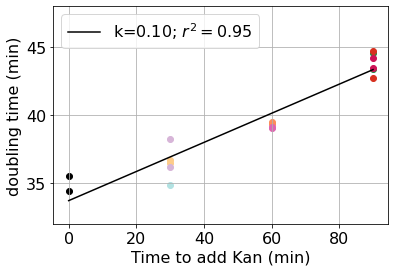

In [403]:
kk = 0;
xdata = [];
ydata = [];
labels = [];
plt.rcParams["figure.figsize"] = (6,4)
'''
plt.axvspan(-1,2.5, facecolor='#238b45', alpha=0.1)
plt.axvspan(2.5,8.5, facecolor='#d7301f', alpha=0.1)
plt.axvspan(8.5,14.5, facecolor='#ce1256', alpha=0.1)
plt.axvspan(14.5,16.5, facecolor='grey', alpha=0.1)
plt.axvspan(16.5,19.5, facecolor='black', alpha=0.1)
'''
for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    color = colors_d[name]; 
    if name == 'lysogen':
        name = "lysogen, Kan@0min";
    elif name =='neg':
        name = "neg, no Kan    "
    x_ = 0; 
    if "Kan@30min" in name:
        x_ = 30;
    elif "Kan@60min" in name:
        x_ = 60;
    elif "Kan@90min" in name:
        x_ = 90; 
    if i in [20,21]:
        next;
    else:
        plt.scatter(x_, sample_d[i].growth_rate, color=color)#,label=sample_d[i].sample_name)
        labels.append(name); 
        xdata.append(x_);
        ydata.append(sample_d[i].growth_rate)
        kk = kk+1;
    
slope, intercept, r_value, _, stderr = linregress(xdata, ydata);
x_data = np.array([0,30,60,90])
plt.plot(x_data, slope*x_data+intercept, 'k-',label='k='+str(slope)[:4]+'; $r^2=$'+str(r_value)[:4])
plt.ylim((32,48))
plt.legend(loc='upper left')
#plt.legend(fontsize=12,ncol=2,framealpha=1)
#plt.xticks([1,5,11,15.5,17.5],['MOI=1','MOI=0.1','MOI=10','neg','lysogen']); 
plt.ylabel('doubling time (min)')
plt.xlabel('Time to add Kan (min)')
plt.grid(True)

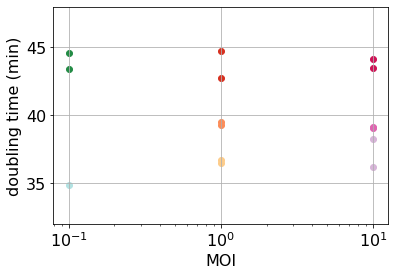

In [408]:
kk = 0;
xdata = [];
ydata = [];
labels = [];
plt.rcParams["figure.figsize"] = (6,4)

for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    color = colors_d[name]; 
    if name == 'lysogen':
        name = "lysogen, Kan@0min";
    elif name =='neg':
        name = "neg, no Kan    "
    x_ = 0; 
    if "MOI=0.1," in name:
        x_ = 0.1;
    elif "MOI=1," in name:
        x_ = 1;
    elif "MOI=10," in name:
        x_ = 10; 
    plt.scatter(x_, sample_d[i].growth_rate, color=color)
    labels.append(name); 
    xdata.append(x_);
    ydata.append(sample_d[i].growth_rate)
    kk = kk+1;
    
#slope, intercept, r_value, _, stderr = linregress(xdata, ydata);
#x_data = np.array([0,0.1,10])
#plt.plot(x_data, slope*x_data+intercept, 'k-',label='k='+str(slope)[:4]+'; $r^2=$'+str(r_value)[:4])
plt.ylim((32,48))
plt.xscale('log')
#plt.legend(loc='upper left')
#plt.legend(fontsize=12,ncol=2,framealpha=1)
#plt.xticks([1,5,11,15.5,17.5],['MOI=1','MOI=0.1','MOI=10','neg','lysogen']); 
plt.ylabel('doubling time (min)')
plt.xlabel('MOI')
plt.grid(True)

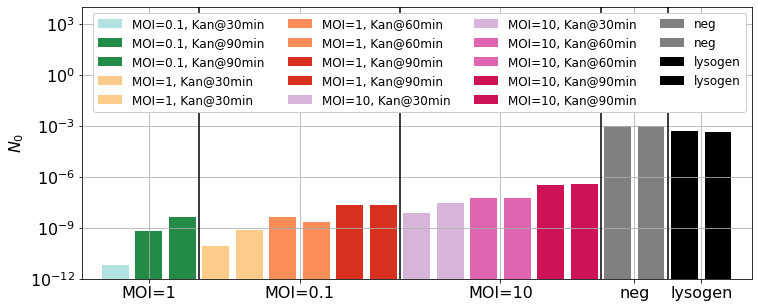

In [409]:
kk = 0;
xdata = [];
labels = [];
plt.rcParams["figure.figsize"] = (12,5)
for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    color = colors_d[name]; 
    if name == 'lysogen':
        name = "lysogen, Kan@0min";
    elif name =='neg':
        name = "neg, no Kan    "
    
    plt.bar(kk, np.power(2,sample_d[i].N0), color=color,label=sample_d[i].sample_name)
    labels.append(name); 
    xdata.append(kk+1);
#    ydata = np.append(ydata, sample_d[i].growth_rate)
    kk = kk+1;
#plt.grid(True)
plt.axvline(2.5,color='black')
plt.axvline(8.5,color='black')
plt.axvline(14.5,color='black')
plt.axvline(16.5,color='black')

plt.ylim((1e-12,10000))
plt.yscale('log')
plt.xlim((-1,19))
plt.legend(fontsize=12,ncol=4,framealpha=1)
plt.xticks([1,5.5,11.5,15.5,17.5],['MOI=1','MOI=0.1','MOI=10','neg','lysogen']); 
plt.ylabel('$N_0$')
plt.grid(True)

# III. Probability of lysogenization

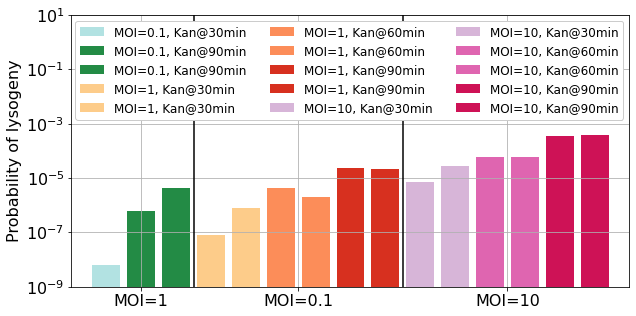

In [437]:
xdata = [];
ydata = []; 
labels = [];

neg_idx = [20,21];
neg_N0 = np.array([]);
for i in neg_idx:
    neg_N0 = np.append(neg_N0, np.power(2,sample_d[i].N0));

kk = 0;
plt.rcParams["figure.figsize"] = (10,5)
for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    color = colors_d[name]; 
    if name == 'lysogen':
        name = "lysogen, Kan@0min";
    elif name =='neg':
        name = "neg, no Kan    "
    if i in [20,21,22,23]:
        next;
    else:
        sample_N0 = np.power(2,sample_d[i].N0); 
        ratio = sample_N0/np.mean(neg_N0); 
        
        plt.bar(kk, ratio, color=color,label=sample_d[i].sample_name)
        labels.append(name); 
        xdata.append(kk+1);
#    ydata = np.append(ydata, sample_d[i].growth_rate)
        kk = kk+1;

plt.axvline(2.5,color='black')
plt.axvline(8.5,color='black')
plt.ylim((1e-9,10))
plt.yscale('log')
plt.xlim((-1,15))
plt.legend(fontsize=12,ncol=3,framealpha=1)
plt.xticks([1,5.5,11.5],['MOI=1','MOI=0.1','MOI=10']); 
plt.ylabel('Probability of lysogeny')
plt.grid(True)

Text(0.5, 1.0, 'MOI=1')

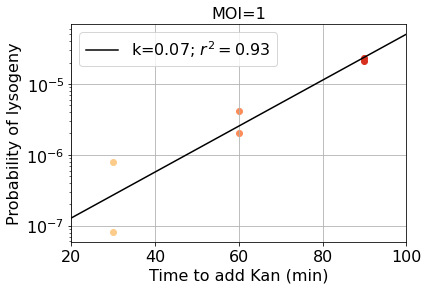

In [456]:
xdata = [];
ydata = []; 
labels = [];

neg_idx = [20,21];
neg_N0 = np.array([]);
for i in neg_idx:
    neg_N0 = np.append(neg_N0, np.power(2,sample_d[i].N0));

kk = 0;
plt.rcParams["figure.figsize"] = (6,4)
for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    if "Kan@30min" in name:
        x_ = 30;
    elif "Kan@60min" in name:
        x_ = 60;
    elif "Kan@90min" in name:
        x_ = 90; 
    if i in [20,21,22,23]:
        next;
    elif i in [8,9,10,11,12,13]:
        color = colors_d[name]; 
        sample_N0 = np.power(2,sample_d[i].N0); 
        ratio = sample_N0/np.mean(neg_N0); 
        
        plt.scatter(x_, ratio, color=color)#,label=sample_d[i].sample_name)
        labels.append(name); 
        xdata.append(x_);
        ydata.append(ratio)
        kk = kk+1;
        
def model1(t,c,kd):
    return c*(1-np.exp(-kd*t))

slope, intercept, r_value, _, stderr = linregress(xdata, np.log(ydata));
x_data = np.arange(20,100,0.001)
#popt, pcov = curve_fit(model1, xdata, ydata,p0=[0.1,1/120])
#plt.plot(x_data, model1(x_data,*popt),'k-')
plt.plot(x_data, np.exp(slope*x_data+intercept), 'k-',label='k='+str(slope)[:4]+'; $r^2=$'+str(r_value)[:4])
plt.yscale('log')
plt.xlim((20,100))
plt.xlabel('Time to add Kan (min)')
plt.legend(loc='upper left')
plt.ylabel('Probability of lysogeny')
plt.grid(True)
plt.title('MOI=1')

Text(0.5, 1.0, 'MOI=10')

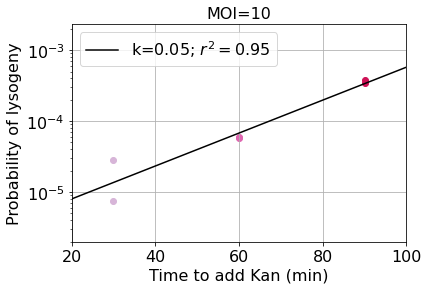

In [538]:
xdata = [];
ydata = []; 
labels = [];

neg_idx = [20,21];
neg_N0 = np.array([]);
for i in neg_idx:
    neg_N0 = np.append(neg_N0, np.power(2,sample_d[i].N0));

kk = 0;
plt.rcParams["figure.figsize"] = (6,4)
for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    if "Kan@30min" in name:
        x_ = 30;
    elif "Kan@60min" in name:
        x_ = 60;
    elif "Kan@90min" in name:
        x_ = 90; 
    if i in [20,21,22,23]:
        next;
    elif i in [14,15,16,17,18,19]:
        color = colors_d[name]; 
        sample_N0 = np.power(2,sample_d[i].N0); 
        ratio = sample_N0/np.mean(neg_N0); 
        
        plt.scatter(x_, ratio, color=color)#,label=sample_d[i].sample_name)
        labels.append(name); 
        xdata.append(x_);
        ydata.append(ratio)
        kk = kk+1;
        

slope, intercept, r_value, _, stderr = linregress(xdata, np.log(ydata));
x_data = np.array([0,30,60,90,120])
plt.plot(x_data, np.exp(slope*x_data+intercept), 'k-',label='k='+str(slope)[:4]+'; $r^2=$'+str(r_value)[:4])
plt.yscale('log')
plt.xlim((20,100))
plt.xlabel('Time to add Kan (min)')
plt.legend(loc='upper left')
plt.ylabel('Probability of lysogeny')
plt.grid(True)
plt.title('MOI=10')

Text(0.5, 1.0, 'Kan@30min')

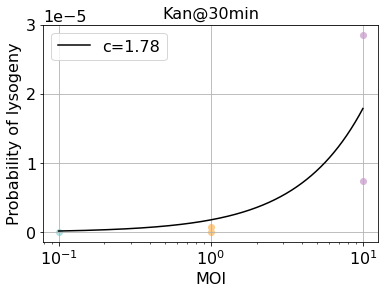

In [539]:
xdata = [];
ydata = []; 
labels = [];

neg_idx = [20,21];
neg_N0 = np.array([]);
for i in neg_idx:
    neg_N0 = np.append(neg_N0, np.power(2,sample_d[i].N0));

kk = 0;
plt.rcParams["figure.figsize"] = (6,4)
for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    if "MOI=0.1," in name:
        x_ = 0.1;
    elif "MOI=1," in name:
        x_ = 1;
    elif "MOI=10," in name:
        x_ = 10; 
    if i in [20,21,22,23]:
        next;
    elif i in [2,3,8,9,14,15]:
        color = colors_d[name]; 
        sample_N0 = np.power(2,sample_d[i].N0); 
        ratio = sample_N0/np.mean(neg_N0); 
        
        plt.scatter(x_, ratio, color=color)#,label=sample_d[i].sample_name)
        labels.append(name); 
        xdata.append(x_);
        ydata.append(ratio)
        kk = kk+1;
        
def model0(t,k):
    return k*t

popt, pcov = curve_fit(model0, xdata, ydata)
x_data = np.arange(0.1,10,0.001)
plt.plot(x_data, model0(x_data, *popt), 'k-', label='c='+str(popt[0])[:4])
#slope, intercept, r_value, _, stderr = linregress(xdata, ydata);
#plt.plot(x_data, slope*x_data+intercept, 'k-',label='k='+str(slope)[:4]+'; $r^2=$'+str(r_value)[:4])
#plt.yscale('log')
#plt.xlim((20,100))
plt.xscale('log')
plt.xlabel('MOI')
plt.legend(loc='upper left')
plt.ylabel('Probability of lysogeny')
plt.grid(True)
plt.title('Kan@30min')

Text(0.5, 1.0, 'Kan@60min')

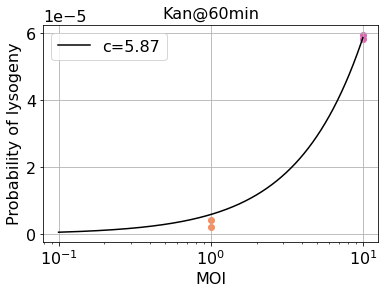

In [540]:
xdata = [];
ydata = []; 
labels = [];

neg_idx = [20,21];
neg_N0 = np.array([]);
for i in neg_idx:
    neg_N0 = np.append(neg_N0, np.power(2,sample_d[i].N0));

kk = 0;
plt.rcParams["figure.figsize"] = (6,4)
for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    if "MOI=0.1," in name:
        x_ = 0.1;
    elif "MOI=1," in name:
        x_ = 1;
    elif "MOI=10," in name:
        x_ = 10; 
    if i in [20,21,22,23]:
        next;
    elif i in [4,5,10,11,16,17]:
        color = colors_d[name]; 
        sample_N0 = np.power(2,sample_d[i].N0); 
        ratio = sample_N0/np.mean(neg_N0); 
        
        plt.scatter(x_, ratio, color=color)#,label=sample_d[i].sample_name)
        labels.append(name); 
        xdata.append(x_);
        ydata.append(ratio)
        kk = kk+1;
        

#slope, intercept, r_value, _, stderr = linregress(xdata, ydata);
#x_data = np.arange(0.1,10,0.001)
#plt.plot(x_data, slope*x_data+intercept, 'k-',label='k='+str(slope)[:4]+'; $r^2=$'+str(r_value)[:4])
popt, pcov = curve_fit(model0, xdata, ydata)
x_data = np.arange(0.1,10,0.001)
plt.plot(x_data, model0(x_data, *popt), 'k-', label='c='+str(popt[0])[:4])
#plt.yscale('log')
#plt.xlim((20,100))
plt.xscale('log')
plt.xlabel('MOI')
plt.legend(loc='upper left')
plt.ylabel('Probability of lysogeny')
plt.grid(True)
plt.title('Kan@60min')

Text(0.5, 1.0, 'Kan@90min')

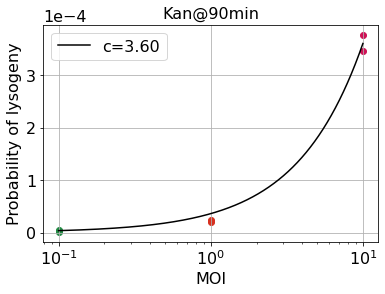

In [542]:
xdata = [];
ydata = []; 
labels = [];

neg_idx = [20,21];
neg_N0 = np.array([]);
for i in neg_idx:
    neg_N0 = np.append(neg_N0, np.power(2,sample_d[i].N0));

kk = 0;
plt.rcParams["figure.figsize"] = (6,4)
for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    if "MOI=0.1," in name:
        x_ = 0.1;
    elif "MOI=1," in name:
        x_ = 1;
    elif "MOI=10," in name:
        x_ = 10; 
    if i in [20,21,22,23]:
        next;
    elif i in [6,7,12,13,18,19]:
        color = colors_d[name]; 
        sample_N0 = np.power(2,sample_d[i].N0); 
        ratio = sample_N0/np.mean(neg_N0); 
        
        plt.scatter(x_, ratio, color=color)#,label=sample_d[i].sample_name)
        labels.append(name); 
        xdata.append(x_);
        ydata.append(ratio)
        kk = kk+1;
        

#slope, intercept, r_value, _, stderr = linregress(xdata, ydata);
#x_data = np.arange(0.1,10,0.001)
#plt.plot(x_data, slope*x_data+intercept, 'k-',label='k='+str(slope)[:4]+'; $r^2=$'+str(r_value)[:4])
popt, pcov = curve_fit(model0, xdata, ydata)
x_data = np.arange(0.1,10,0.001)
plt.plot(x_data, model0(x_data, *popt), 'k-', label='c='+str(popt[0])[:4])
#plt.yscale('log')
#plt.xlim((20,100))
plt.xscale('log')
plt.xlabel('MOI')
plt.legend(loc='upper left')
plt.ylabel('Probability of lysogeny')
plt.grid(True)
plt.title('Kan@90min')

In [522]:
cdata = [];
tdata = []; 
ydata = []; 
labels = [];

neg_idx = [20,21];
neg_N0 = np.array([]);
for i in neg_idx:
    neg_N0 = np.append(neg_N0, np.power(2,sample_d[i].N0));

kk = 0;
plt.rcParams["figure.figsize"] = (6,4)
for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    if "MOI=0.1," in name:
        c_ = 0.1;
    elif "MOI=1," in name:
        c_ = 1;
    elif "MOI=10," in name:
        c_ = 10; 
    if "Kan@30min" in name:
        t_ = 30;
    elif "Kan@60min" in name:
        t_ = 60;
    elif "Kan@90min" in name:
        t_ = 90; 
    if i in [20,21,22,23]:
        next;
    else:
        color = colors_d[name]; 
        sample_N0 = np.power(2,sample_d[i].N0); 
        ratio = sample_N0/np.mean(neg_N0); 
        cdata.append(c_);
        tdata.append(t_); 
        ydata.append(ratio);

xdata = np.vstack((np.array(cdata), np.array(tdata))); 
ydata = np.array(ydata);
def model0(X,c1,k):
    c,t = X; 
    return c1*c*np.exp(k*t)

popt, pcov = curve_fit(model0, xdata, ydata, p0=[3.6,0.05])
residuals = ydata- model0(xdata, *popt); 
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)
print(popt[1])

0.9940764424563145
0.059083954817288536


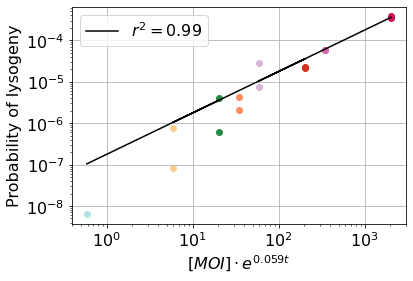

In [523]:
cdata = [];
tdata = []; 
xdata = [];
ydata = []; 

labels = [];

neg_idx = [20,21];
neg_N0 = np.array([]);
for i in neg_idx:
    neg_N0 = np.append(neg_N0, np.power(2,sample_d[i].N0));

kk = 0;
plt.rcParams["figure.figsize"] = (6,4)
for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    if "MOI=0.1," in name:
        c_ = 0.1;
    elif "MOI=1," in name:
        c_ = 1;
    elif "MOI=10," in name:
        c_ = 10; 
    if "Kan@30min" in name:
        t_ = 30;
    elif "Kan@60min" in name:
        t_ = 60;
    elif "Kan@90min" in name:
        t_ = 90; 
    if i in [20,21,22,23]:
        next;
    else:
        color = colors_d[name]; 
        sample_N0 = np.power(2,sample_d[i].N0); 
        ratio = sample_N0/np.mean(neg_N0); 
        x_ = c_*exp(popt[1]*t_); 
        plt.scatter(x_, ratio, color=color)#,label=sample_d[i].sample_name)
        labels.append(name); 
        cdata.append(c_);
        tdata.append(t_); 
        xdata.append(x_);
        ydata.append(ratio)
        kk = kk+1;
        
#popt, pcov = curve_fit(model0, xdata, ydata, p0=[3.6,0.05]); 
plt.plot(np.array(xdata), popt[0]*np.array(xdata), 'k-', label='$r^2=$'+str(r_squared)[:4])

plt.xscale('log')
#plt.xlim((20,100))
plt.yscale('log')
plt.xlabel('$[MOI]\cdot e^{0.059t}$')
plt.legend(loc='upper left')
plt.ylabel('Probability of lysogeny')
plt.grid(True)
#plt.title('Kan@30min')

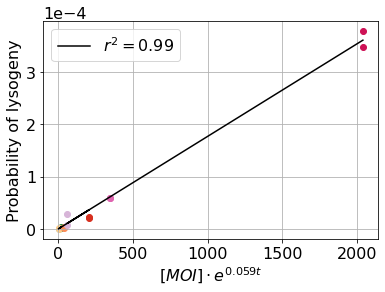

In [524]:
cdata = [];
tdata = []; 
xdata = [];
ydata = []; 

labels = [];

neg_idx = [20,21];
neg_N0 = np.array([]);
for i in neg_idx:
    neg_N0 = np.append(neg_N0, np.power(2,sample_d[i].N0));

kk = 0;
plt.rcParams["figure.figsize"] = (6,4)
for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    if "MOI=0.1," in name:
        c_ = 0.1;
    elif "MOI=1," in name:
        c_ = 1;
    elif "MOI=10," in name:
        c_ = 10; 
    if "Kan@30min" in name:
        t_ = 30;
    elif "Kan@60min" in name:
        t_ = 60;
    elif "Kan@90min" in name:
        t_ = 90; 
    if i in [20,21,22,23]:
        next;
    else:
        color = colors_d[name]; 
        sample_N0 = np.power(2,sample_d[i].N0); 
        ratio = sample_N0/np.mean(neg_N0); 
        x_ = c_*exp(popt[1]*t_); 
        plt.scatter(x_, ratio, color=color)#,label=sample_d[i].sample_name)
        labels.append(name); 
        cdata.append(c_);
        tdata.append(t_); 
        xdata.append(x_);
        ydata.append(ratio)
        kk = kk+1;
        
#popt, pcov = curve_fit(model0, xdata, ydata, p0=[3.6,0.05]); 
plt.plot(np.array(xdata), popt[0]*np.array(xdata), 'k-', label='$r^2=$'+str(r_squared)[:4])

#plt.xscale('log')
#plt.xlim((20,100))
#plt.yscale('log')
plt.xlabel('$[MOI]\cdot e^{0.059t}$')
plt.legend(loc='upper left')
plt.ylabel('Probability of lysogeny')
plt.grid(True)
#plt.title('Kan@30min')

In [530]:
cdata = [];
tdata = []; 
ydata = []; 
labels = [];

neg_idx = [20,21];
neg_N0 = np.array([]);
for i in neg_idx:
    neg_N0 = np.append(neg_N0, np.power(2,sample_d[i].N0));

kk = 0;
plt.rcParams["figure.figsize"] = (6,4)
for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    if "MOI=0.1," in name:
        c_ = 0.1;
    elif "MOI=1," in name:
        c_ = 1;
    elif "MOI=10," in name:
        c_ = 10; 
    if "Kan@30min" in name:
        t_ = 30;
    elif "Kan@60min" in name:
        t_ = 60;
    elif "Kan@90min" in name:
        t_ = 90; 
    if i in [20,21,22,23]:
        next;
    else:
        color = colors_d[name]; 
        sample_N0 = np.power(2,sample_d[i].N0); 
        ratio = sample_N0/np.mean(neg_N0); 
        cdata.append(c_);
        tdata.append(t_); 
        ydata.append(ratio);

xdata = np.vstack((np.array(cdata), np.array(tdata))); 
ydata = np.array(ydata);
def model0(X,c1,k):
    c,t = X; 
    return np.log(c)+np.log(c1)+k*t

popt, pcov = curve_fit(model0, xdata, np.log(ydata), p0=[3.6,0.05])
residuals = np.log(ydata)- model0(xdata, *popt); 
ss_res = np.sum(residuals**2)
ss_tot = np.sum((np.log(ydata)-np.mean(np.log(ydata)))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)
print(popt[0])
print(popt[1])

0.887944654385169
5.518079637031384e-08
0.06812657590826263


<ipython-input-530-8bc968ec1db9>:41: RuntimeWarning: invalid value encountered in log
  return np.log(c)+np.log(c1)+k*t


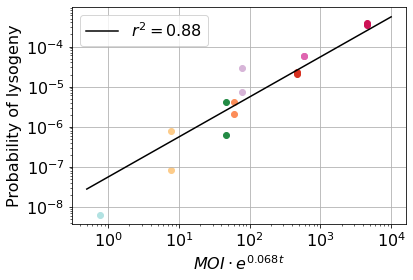

In [535]:
cdata = [];
tdata = []; 
xdata = [];
ydata = []; 

labels = [];

neg_idx = [20,21];
neg_N0 = np.array([]);
for i in neg_idx:
    neg_N0 = np.append(neg_N0, np.power(2,sample_d[i].N0));

kk = 0;
plt.rcParams["figure.figsize"] = (6,4)
for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    if "MOI=0.1," in name:
        c_ = 0.1;
    elif "MOI=1," in name:
        c_ = 1;
    elif "MOI=10," in name:
        c_ = 10; 
    if "Kan@30min" in name:
        t_ = 30;
    elif "Kan@60min" in name:
        t_ = 60;
    elif "Kan@90min" in name:
        t_ = 90; 
    if i in [20,21,22,23]:
        next;
    else:
        color = colors_d[name]; 
        sample_N0 = np.power(2,sample_d[i].N0); 
        ratio = sample_N0/np.mean(neg_N0); 
        x_ = c_*exp(popt[1]*t_); 
        plt.scatter(x_, ratio, color=color)#,label=sample_d[i].sample_name)
        labels.append(name); 
        cdata.append(c_);
        tdata.append(t_); 
        xdata.append(x_);
        ydata.append(ratio)
        kk = kk+1;
        
#popt, pcov = curve_fit(model0, xdata, ydata, p0=[3.6,0.05]); 
x_data = np.arange(0.5,1e4,0.1)
plt.plot(np.array(x_data), popt[0]*np.array(x_data), 'k-', label='$r^2=$'+str(r_squared)[:4])

plt.xscale('log')
#plt.xlim((20,100))
plt.yscale('log')
plt.xlabel('$MOI\cdot e^{0.068t}$')
plt.legend(loc='upper left')
plt.ylabel('Probability of lysogeny')
plt.grid(True)
#plt.title('Kan@30min')